In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

from task1 import load_data, build_adjacency_matrix, initialize_rank_vector

# A

In [2]:
# 计算死胡同节点数量
def count_dead_ends(M):
    dead_ends = np.where(M.sum(axis=0).A.ravel() == 0)[0]
    num_dead_ends = len(dead_ends)
    print(f'Number of dead-end nodes: {num_dead_ends}')
    return dead_ends

# 计算每次迭代中的PageRank泄漏
def power_iteration_with_leak(M, r, dead_ends, epsilon=0.02, max_iterations=1000):
    leakages = []
    for i in range(max_iterations):
        r_next = M @ r
        leak = np.sum(r[dead_ends])  # 计算当前迭代中的泄漏分数
        leakages.append(leak)
        
        if np.linalg.norm(r_next - r, 1) < epsilon:
            print(f'Convergence reached after {i+1} iterations.')
            return r_next, i + 1, leakages
        r = r_next
    
    print('Max iterations reached without convergence.')
    return r, max_iterations, leakages

In [3]:
edges, num_nodes = load_data('./files/web-Google.txt')
M = build_adjacency_matrix(edges, num_nodes)
r = initialize_rank_vector(num_nodes)

dead_ends = count_dead_ends(M)

Number of dead-end nodes: 176974


/Users/dongyanshen/Desktop/DYSProjects/TBProject/Data_24Aug09/task1.py:31: RuntimeWarning: divide by zero encountered in divide
  M = M.multiply(1.0 / M.sum(axis=0).A.ravel())


# B

In [4]:
# 计算每次迭代中的PageRank泄漏
def power_iteration_with_leak(M, r, dead_ends, epsilon=0.02, max_iterations=1000):
    leakages = []
    for i in range(max_iterations):
        r_next = M @ r
        leak = np.sum(r[dead_ends])  # 计算当前迭代中的泄漏分数
        leakages.append(leak)
        
        if np.linalg.norm(r_next - r, 1) < epsilon:
            print(f'Convergence reached after {i+1} iterations.')
            return r_next, i + 1, leakages
        r = r_next
    
    print('Max iterations reached without convergence.')
    return r, max_iterations, leakages

# 绘制泄漏分数随迭代次数变化的图表
def plot_leakages(leakages):
    plt.plot(leakages)
    plt.xlabel('Iteration')
    plt.ylabel('Leaked PageRank Score')
    plt.title('Leaked PageRank Score Over Iterations')
    plt.show()

Convergence reached after 55 iterations.


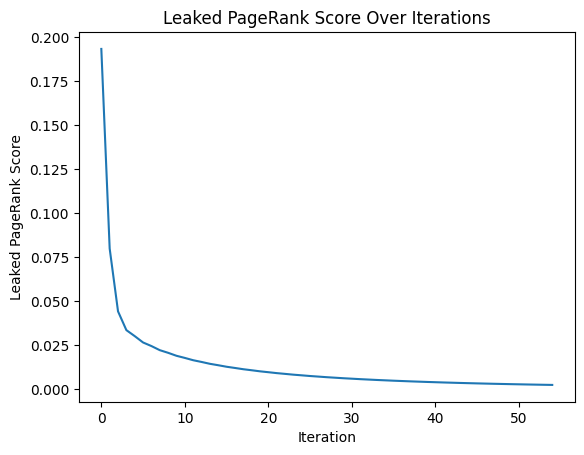

In [5]:
r, iterations, leakages = power_iteration_with_leak(M, r, dead_ends)
plot_leakages(leakages)